<a href="https://colab.research.google.com/github/rayssasnt/regressao_linear_machine-learning/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/rayssasnt/regressao_linear_machine-learning/refs/heads/main/Pre%C3%A7os_de_casas.csv"
dados = pd.read_csv(url)

In [2]:
dados.head(3)

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [4]:
dados = dados.drop(columns='Id')

In [5]:
# correlação

corr = dados.corr()

In [6]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

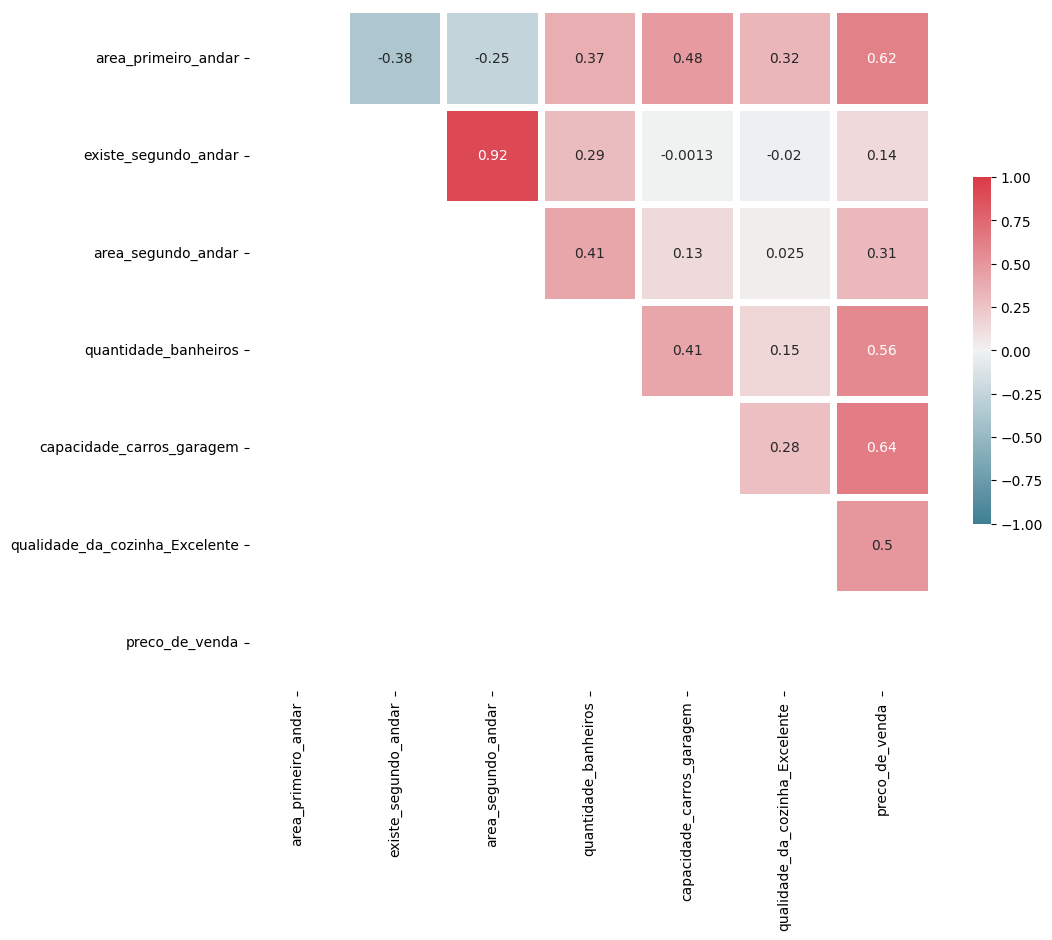

In [8]:
masc = np.zeros_like(corr , dtype=bool)
masc[np.tril_indices_from(masc)] = True

# config a fig do matplotlib
figure , ax = plt.subplots(figsize=(11,9))

#gerar o heatmap

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=masc , cmap=cmap, vmax=1, vmin= -1, center=0,
            square=True , linewidths=5, annot=True, cbar_kws={"shrink":.5})

plt.show()



---



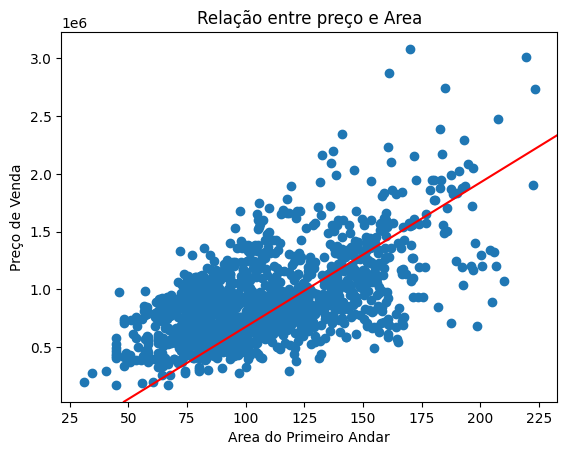

In [9]:
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relação entre preço e Area")
plt.xlabel("Area do Primeiro Andar")
plt.ylabel("Preço de Venda")

# linha vermelha
plt.axline(xy1=(66, 250000), xy2=(190, 1800000),color='red')
plt.show()

In [10]:
px.scatter(dados , x ='area_primeiro_andar', y ='preco_de_venda',
           trendline_color_override='red', trendline='ols')



---



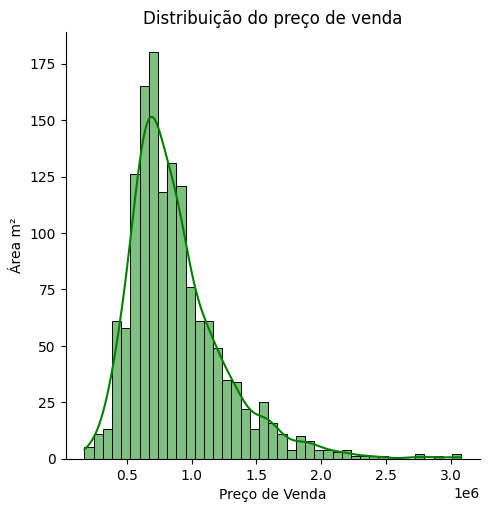

In [101]:
# variavel explicativa/indepedente: área do primeiro andar
# variável resposta/dependente: preço da casa

sns.displot(dados['preco_de_venda'],kde=True, color="green")
plt.title("Distribuição do preço de venda")
plt.ylabel('Área m²')
plt.xlabel('Preço de Venda')
plt.show()



---
##Treinando o modelo

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# x e y
y = dados['preco_de_venda']
X = dados.drop(columns='preco_de_venda')

In [14]:
# aplicando o split de y e x
# random_state > deixa a base de treino e teste aleatoria para o modelo
X_train , X_test , y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=230)

In [15]:
df_train = pd.DataFrame(data=X_train)
df_train['preco_de_venda'] = y_train

In [16]:
from statsmodels.formula.api import ols

model = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()



---



In [17]:
# parametros
model.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          2.22e-105
Time:                        18:52:58   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3



---


O coeficiente R², também conhecido como coeficiente de determinação, retornou 0.37. Podemos interpretar isso como 37% da variação nos preços das casas sendo explicada pelo tamanho do primeiro andar. Isso representa uma quantidade significativa de explicação, mas há mais a ser analisado.

Quanto mais próximo de 1 o valor de R², melhor é a explicabilidade do modelo. Então, apesar de termos 37% de explicação com apenas uma variável, é importante compreender que outros fatores podem influenciar os preços das casas.

Aproximadamente 62% da variação dos preços não está sendo explicada pelo tamanho do primeiro andar.



---



In [19]:
model.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


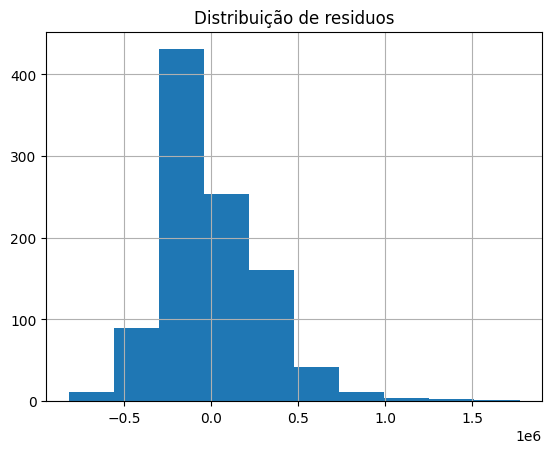

In [20]:
model.resid.hist()
plt.title("Distribuição de residuos")
plt.show()

In [21]:
y_predict = model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
print(f"R²: {r2_score(y_test,y_predict)}")
# quanto mais perto de 0 melhor
# explicabilidade do model
# =~ 37 , 38% do valor das casas tem relação com o primeiro andar

R²: 0.38530928723202407


O modelo com apenas o fator *area do primeiro andar* nos mostrou um R² de 0.37 , aproximadamente 37% da variação observada nos preços das casaspode ser explicada pela variação na área.

Há uma quantidade significativa de variação que não está sendo capturada pelo modelo.

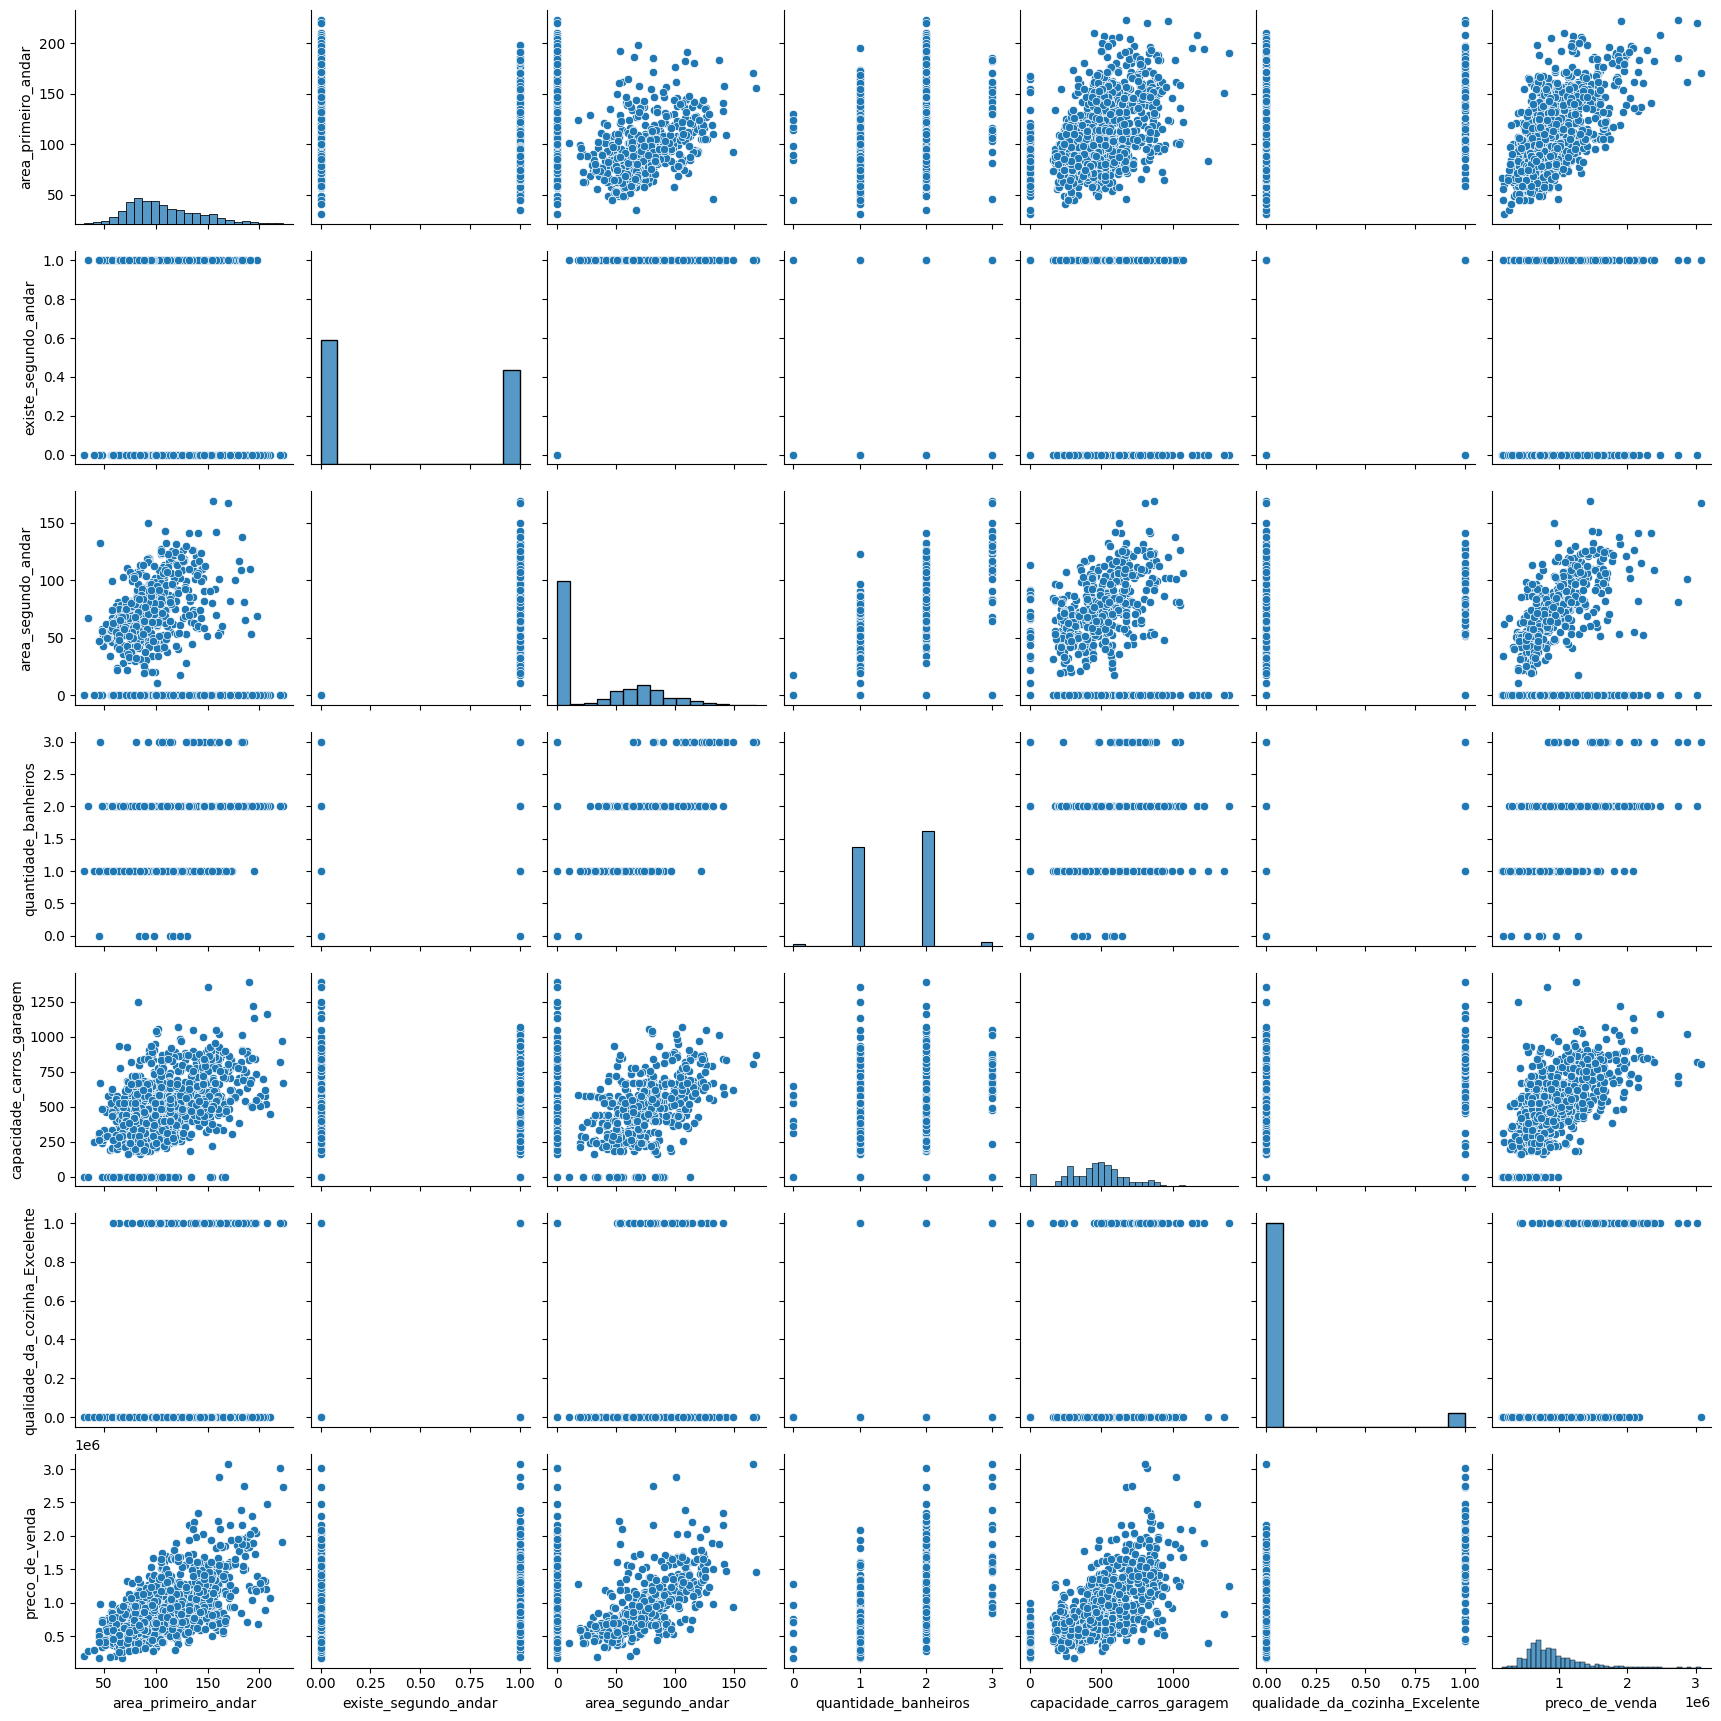

In [24]:
sns.pairplot(dados)

In [25]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

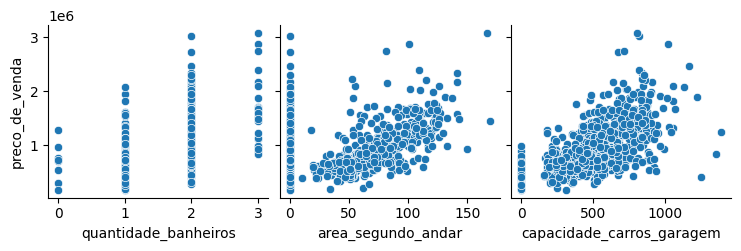

In [104]:
sns.pairplot(dados, y_vars='preco_de_venda', x_vars=['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])


In [27]:
import statsmodels.api as sm

In [28]:
# add o constante , para ajudar a estimar os perceptos
X_train = sm.add_constant(X_train)

In [29]:
X_train.head(3)

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0


In [30]:
X_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [31]:
# estudadando o preço da casa com base nos parametros
model_2 = sm.OLS(y_train,X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                                  'area_segundo_andar', 'quantidade_banheiros',
                                  'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [32]:
# sem area do segundo andar
model_3 = sm.OLS(y_train,X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                                  'quantidade_banheiros', 'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [33]:
# sem informação sobre a garagem
model_4 = sm.OLS(y_train,X_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                                   'quantidade_banheiros',
                                  'qualidade_da_cozinha_Excelente']]).fit()

In [34]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          2.79e-289
Time:                        18:53:06   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [35]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          1.93e-264
Time:                        18:53:06   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [36]:
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          4.15e-227
Time:                        18:53:06   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparando Modelos

In [37]:
print("R²:")
print("Modelo 1 com apenas uma variavel explicativa:",model.rsquared.round(2))
print("Modelo 2 com todas as variaveis explicativas:",model_2.rsquared.round(2))
print("Modelo 3 sem a variavel segundo andar:",model_3.rsquared.round(2))
print("Modelo 4 sem a variavel garagem:",model_4.rsquared.round(2))

R²:
Modelo 1 com apenas uma variavel explicativa: 0.38
Modelo 2 com todas as variaveis explicativas: 0.74
Modelo 3 sem a variavel segundo andar: 0.71
Modelo 4 sem a variavel garagem: 0.65


In [38]:
# quant de parametros em cada modelo
print(len(model.params))
print(len(model_2.params))
print(len(model_3.params))
print(len(model_4.params))


2
7
6
5


In [39]:
print(model_4.params)

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64


In [40]:
X_test= sm.add_constant(X_test)

In [41]:
# Prevendo com o model_4
predict_4 = model_4.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente']])

In [42]:
# Qual o R² da previsão?
print("Qual o R² da previsão?",model_4.rsquared)

# Qual o R² do treino?
print("Qual o R² do treino?", r2_score(y_test, predict_4))

Qual o R² da previsão? 0.6511289354898803
Qual o R² do treino? 0.6432078074497706




---

## Precificando uma casa

In [43]:
print(model_4.params)

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64


In [44]:
# novo imovel
imovel = pd.DataFrame({'const':[1],
                       'area_primeiro_andar':[120],
                       'existe_segundo_andar' :[1],
                       'quantidade_banheiros':[2],
                       'qualidade_da_cozinha_Excelente':[0]
                       })

In [45]:
# modelo 1
print(model.predict(imovel['area_primeiro_andar']))

0    968146.285305
dtype: float64


In [46]:
model_4.predict(imovel)

,0
0,1.123758e+06




---



In [48]:
imovel_2 = pd.DataFrame({'const':[1],
                       'area_primeiro_andar':[98],
                       'existe_segundo_andar' :[0],
                       'quantidade_banheiros':[1],
                       'qualidade_da_cozinha_Excelente':[1]
                       })

In [116]:
print(model_4.predict(imovel_2)[0])

1063173.8519646404




---

# Investigando a muticolinearidade

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
expliativas_1 = ['const','area_primeiro_andar','existe_segundo_andar',
                 'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                 'qualidade_da_cozinha_Excelente']

expliativas_2 = ['const','area_primeiro_andar','existe_segundo_andar',
                'quantidade_banheiros','capacidade_carros_garagem',
                 'qualidade_da_cozinha_Excelente']

expliativas_4 = ['const','area_primeiro_andar','existe_segundo_andar',
                'quantidade_banheiros','qualidade_da_cozinha_Excelente']

In [89]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = expliativas_1

vif_1['vif'] = [variance_inflation_factor(X_train[expliativas_1], i ) for i in range(len(expliativas_1))]

In [90]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [93]:
# VIF 1
vif_4= pd.DataFrame()
vif_4['variavel'] = expliativas_4

vif_4['vif'] = [variance_inflation_factor(X_train[expliativas_4], i ) for i in range(len(expliativas_4))]

In [94]:
vif_4

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795




---



# Análise dos Resíduos

In [95]:
#prevendo os valores do treino
y_previsto_train = model_4.predict(X_train[expliativas_4])

In [96]:
fig = px.scatter(x= y_previsto_train, y = y_train,
                 title='Previsão x Real',
                 labels={'x':'Preço previsto','y':'Preço Real'})

fig.show()

In [97]:
residuos = model_4.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

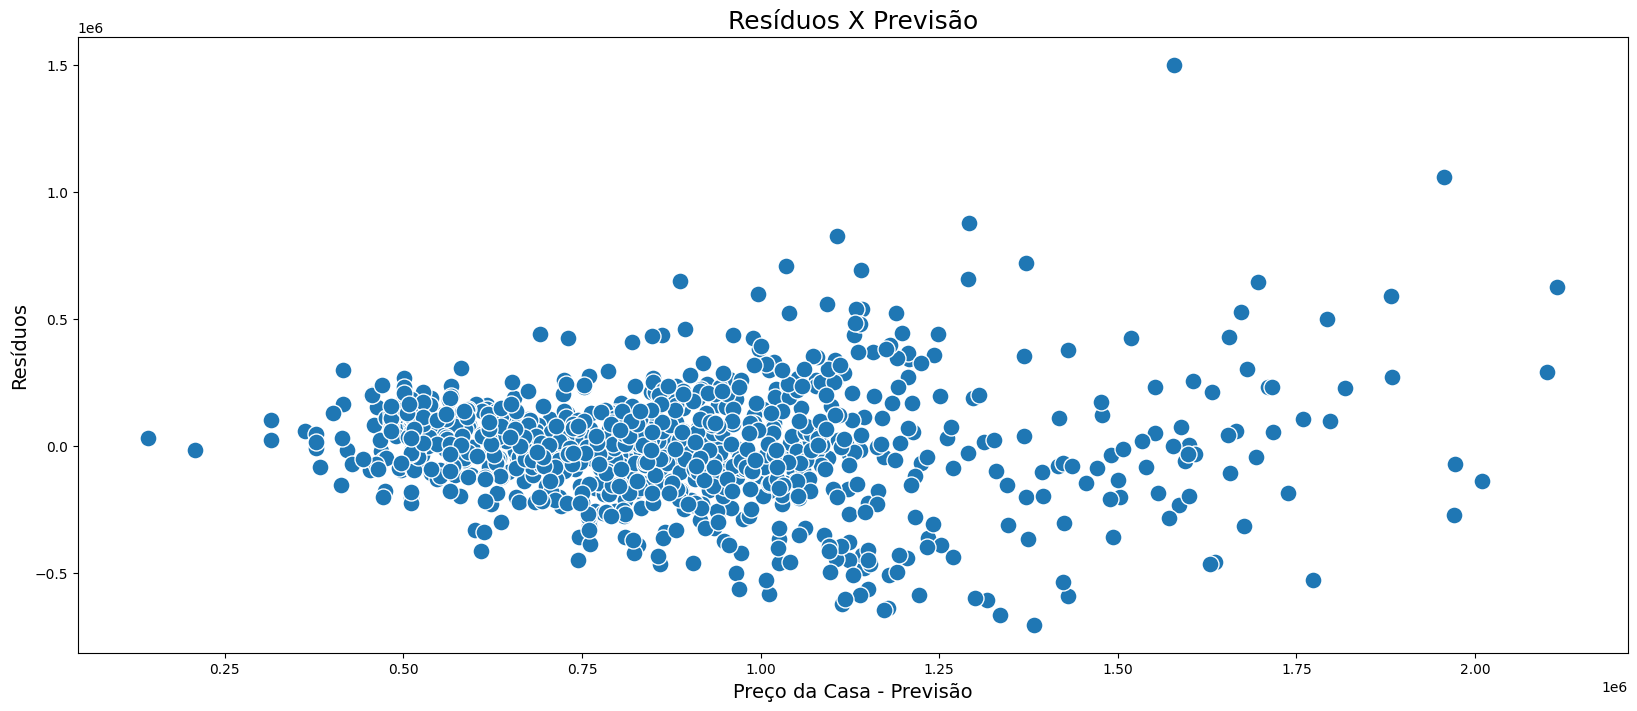

In [98]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

# Novo dataset

In [50]:
novas_casas = pd.read_csv('https://raw.githubusercontent.com/rayssasnt/regressao_linear_machine-learning/refs/heads/main/Novas_casas.csv' , sep=';')

In [51]:
novas_casas

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1
5,6,140,1,2,0
6,7,170,0,3,0
7,8,190,1,2,0
8,9,130,0,2,0
9,10,180,1,3,0


In [52]:
# excluindo ID
novas_casas = novas_casas.drop(columns='Casa')

In [53]:
novas_casas

,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,150,1,2,1
1,180,0,3,1
2,120,1,2,1
3,200,1,3,1
4,160,0,2,1
5,140,1,2,0
6,170,0,3,0
7,190,1,2,0
8,130,0,2,0
9,180,1,3,0


In [54]:
# add const
novas_casas = sm.add_constant(novas_casas)

In [55]:
model_4.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06




---


# Como salvar o Modelo com Pickle

In [56]:
import pickle

nome = 'modelo_regressao-linear.pkl'

# salvar em arquivo
with open(nome, 'wb') as arquivo:
  pickle.dump(model_4,arquivo)

In [57]:
# carregar o arquivo
with open(nome,'rb') as arquivo:
  abrir_modelo = pickle.load(arquivo)

In [58]:
abrir_modelo.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


# Exercicios

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/rayssasnt/regressao_linear_machine-learning/refs/heads/main/data_exercicio.csv")

In [60]:
df.head(5)

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


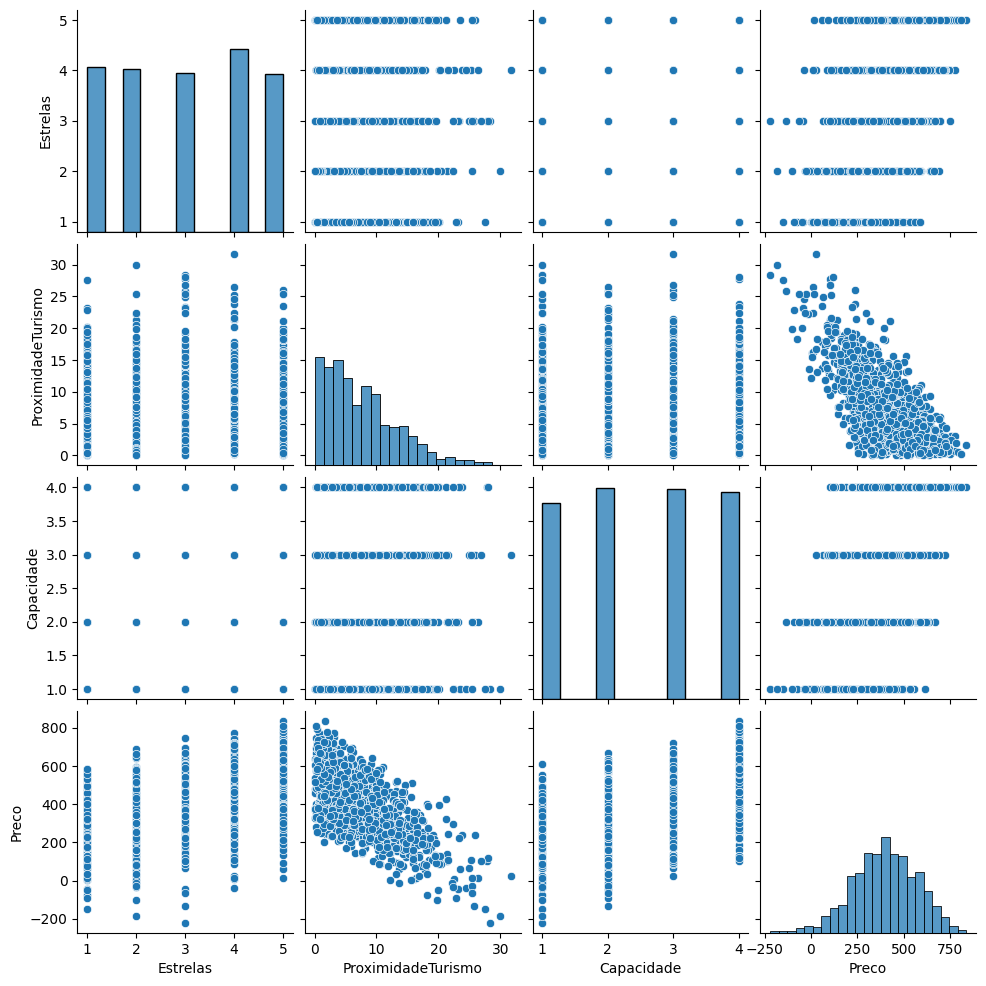

In [62]:
sns.pairplot(df)

In [63]:
x = df.drop(columns='Preco')
y = df['Preco']

# dividindo treino e teste
X_treino, X_teste , y_treino, y_teste = train_test_split(x , y , test_size=0.3 , random_state=200)

In [64]:
df_treino = pd.DataFrame(data=X_treino)
df_treino['Preco'] = y_treino

In [65]:
df_treino.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

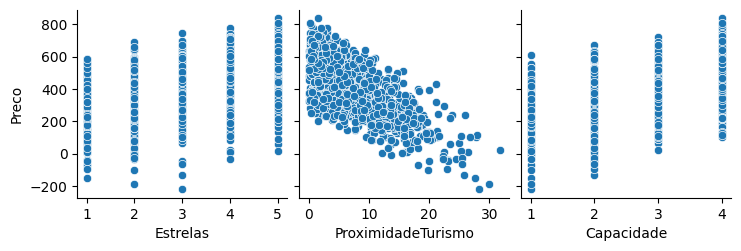

In [66]:
sns.pairplot(data=df,y_vars='Preco', x_vars=['Estrelas', 'ProximidadeTurismo', 'Capacidade'] )

- Quanto maior *avaliação maior o preço* , mas quartos com 1 avaliação podem custar até 600$

- Quanto mais próximo maior preço de quarto

- Quanto maior a capacidade maior o custo do quarto

In [67]:
X_treino = sm.add_constant(X_treino)
# add constantes

In [68]:
X_treino.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [69]:
modelo = sm.OLS(y_treino, X_treino[['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

In [70]:
# sem proximidade
modelo_2 = sm.OLS(y_treino, X_treino[['const', 'Estrelas','Capacidade']]).fit()

In [71]:
# sem estrelas
modelo_3 = sm.OLS(y_treino, X_treino[['const','ProximidadeTurismo','Capacidade']]).fit()

In [72]:
print("Variáveis : Estrelas, ProximidadeTurismo e Capacidade\n",modelo.summary())

Variáveis : Estrelas, ProximidadeTurismo e Capacidade
                             OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2904.
Date:                Sat, 14 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:53:10   Log-Likelihood:                -3691.5
No. Observations:                 700   AIC:                             7391.
Df Residuals:                     696   BIC:                             7409.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [73]:
print("Variáveis : Estrelas e Capacidade\n" , modelo_2.summary())

Variáveis : Estrelas e Capacidade
                             OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     291.3
Date:                Sat, 14 Feb 2026   Prob (F-statistic):           1.15e-92
Time:                        18:53:10   Log-Likelihood:                -4390.3
No. Observations:                 700   AIC:                             8787.
Df Residuals:                     697   BIC:                             8800.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.

In [74]:
print("Variáveis : Proximidade e Capacidade\n",modelo_3.summary())

Variáveis : Proximidade e Capacidade
                             OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1089.
Date:                Sat, 14 Feb 2026   Prob (F-statistic):          3.28e-215
Time:                        18:53:10   Log-Likelihood:                -4106.9
No. Observations:                 700   AIC:                             8220.
Df Residuals:                     697   BIC:                             8234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [80]:
print("R²:")
print("Modelo 1 ,Variáveis Estrelas, ProximidadeTurismo e Capacidade:",modelo.rsquared.round(2))
print("\nModelo 2 , Variáveis Estrelas e Capacidade:",modelo_2.rsquared.round(2))
print("\nModelo 3, Proximidade e Capacidade:",modelo_3.rsquared.round(2))

R²:
Modelo 1 ,Variáveis Estrelas, ProximidadeTurismo e Capacidade: 0.93

Modelo 2 , Variáveis Estrelas e Capacidade: 0.46

Modelo 3, Proximidade e Capacidade: 0.76
